Create spectograms from UrbanSound8k wav files. <br>
SR = 16,000<br>
Mono = True<br>
16bit =?? <br>
<br>
Last run May 18, 2022 at 10pm

In [1]:
from google.colab import drive #Only if you are using Google Drive
drive.mount('/content/gdrive')
drive.mount("/content/gdrive", force_remount=True)
%cd /content/gdrive/My\ Drive/

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
Mounted at /content/gdrive
/content/gdrive/My Drive


In [3]:
import librosa, librosa.display
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math 

proc_UrbanSound8k_file = '/content/gdrive/MyDrive/urbansound/UrbanSound8K_processed.csv'
us8kf = '/content/gdrive/MyDrive/urbansound/UrbanSound8K.csv'
mycsv = pd.read_csv(us8kf)
df_us8kf = pd.DataFrame(mycsv)

print(df_us8kf.info())
print(df_us8kf.head())

wavf = '/content/gdrive/MyDrive/urbansound/wav/fold'
figf = '/content/gdrive/MyDrive/urbansound/spectograms/protosound2/'
df_us8kf['wavfile']=df_us8kf.apply(lambda row: wavf+str(row.fold)+'/'+row.slice_file_name, axis=1)
df_us8kf['figfile']=df_us8kf.apply(lambda row: figf+row.slice_file_name+'.png', axis=1)
df_us8kf['split'] = 'undetermined'
print(df_us8kf.info())

df_us8kf['class'].value_counts()

df_1 = df_us8kf[df_us8kf['class'] == 'dog_bark'].copy()
df_2 = df_us8kf[df_us8kf['class'] == 'children_playing'].copy()
df_3 = df_us8kf[df_us8kf['class'] == 'air_conditioner'].copy()
df_4 = df_us8kf[df_us8kf['class'] == 'street_music'].copy()
df_5 = df_us8kf[df_us8kf['class'] == 'engine_idling'].copy()
df_6 = df_us8kf[df_us8kf['class'] == 'jackhammer'].copy()
df_7 = df_us8kf[df_us8kf['class'] == 'drilling'].copy()
df_8 = df_us8kf[df_us8kf['class'] == 'siren'].copy()
df_9 = df_us8kf[df_us8kf['class'] == 'car_horn'].copy()
df_10 = df_us8kf[df_us8kf['class'] == 'gun_shot'].copy()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8732 entries, 0 to 8731
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   slice_file_name  8732 non-null   object 
 1   fsID             8732 non-null   int64  
 2   start            8732 non-null   float64
 3   end              8732 non-null   float64
 4   salience         8732 non-null   int64  
 5   fold             8732 non-null   int64  
 6   classID          8732 non-null   int64  
 7   class            8732 non-null   object 
dtypes: float64(2), int64(4), object(2)
memory usage: 545.9+ KB
None
      slice_file_name    fsID  start        end  salience  fold  classID  \
0    100032-3-0-0.wav  100032    0.0   0.317551         1     5        3   
1  100263-2-0-117.wav  100263   58.5  62.500000         1     5        2   
2  100263-2-0-121.wav  100263   60.5  64.500000         1     5        2   
3  100263-2-0-126.wav  100263   63.0  67.000000         1    

In [4]:
all=[]
#df_1.shape[0]
trainct = round((df_1.shape[0])* 0.8)
rowct = 0


for row in df_1.itertuples():
    if rowct <= (trainct-1):
        df_1.at[row.Index, "split"] = 'train'
        rowct = rowct+1
    else:
        df_1.at[row.Index, 'split'] = 'test'

##################################
trainct = round((df_2.shape[0])* 0.8)
rowct = 0

for row in df_2.itertuples():
    if rowct <= (trainct-1):
        df_2.at[row.Index, "split"] = 'train'
        rowct = rowct+1
    else:
        df_2.at[row.Index, 'split'] = 'test'
##################################
trainct = round((df_3.shape[0])* 0.8)
rowct = 0

for row in df_3.itertuples():
    if rowct <= (trainct-1):
        df_3.at[row.Index, "split"] = 'train'
        rowct = rowct+1
    else:
        df_3.at[row.Index, 'split'] = 'test'
##################################
trainct = round((df_4.shape[0])* 0.8)
rowct = 0

for row in df_4.itertuples():
    if rowct <= (trainct-1):
        df_4.at[row.Index, "split"] = 'train'
        rowct = rowct+1
    else:
        df_4.at[row.Index, 'split'] = 'test'

##################################
trainct = round((df_5.shape[0])* 0.8)
rowct = 0

for row in df_5.itertuples():
    if rowct <= (trainct-1):
        df_5.at[row.Index, "split"] = 'train'
        rowct = rowct+1
    else:
        df_5.at[row.Index, 'split'] = 'test'
##################################
trainct = round((df_6.shape[0])* 0.8)
rowct = 0

for row in df_6.itertuples():
    if rowct <= (trainct-1):
        df_6.at[row.Index, "split"] = 'train'
        rowct = rowct+1
    else:
        df_6.at[row.Index, 'split'] = 'test'
##################################
trainct = round((df_7.shape[0])* 0.8)
rowct = 0

for row in df_7.itertuples():
    if rowct <= (trainct-1):
        df_7.at[row.Index, "split"] = 'train'
        rowct = rowct+1
    else:
        df_7.at[row.Index, 'split'] = 'test'
##################################
trainct = round((df_8.shape[0])* 0.8)
rowct = 0

for row in df_8.itertuples():
    if rowct <= (trainct-1):
        df_8.at[row.Index, "split"] = 'train'
        rowct = rowct+1
    else:
        df_8.at[row.Index, 'split'] = 'test'
##################################
trainct = round((df_9.shape[0])* 0.8)
rowct = 0

for row in df_9.itertuples():
    if rowct <= (trainct-1):
        df_9.at[row.Index, "split"] = 'train'
        rowct = rowct+1
    else:
        df_9.at[row.Index, 'split'] = 'test'
##################################
trainct = round((df_10.shape[0])* 0.8)
rowct = 0

for row in df_10.itertuples():
    if rowct <= (trainct-1):
        df_10.at[row.Index, "split"] = 'train'
        rowct = rowct+1
    else:
        df_10.at[row.Index, 'split'] = 'test'


In [6]:
# one time run
# delete me after
frames = [df_1, df_2, df_3, df_4, df_5, df_6, df_7, df_8, df_9, df_10]
df_all = pd.concat(frames)
df_test = df_all[df_all['split'] == 'test'].copy()

In [8]:
frames = [df_1, df_2, df_3, df_4, df_5, df_6, df_7, df_8, df_9, df_10]
df_all = pd.concat(frames)
df_all.to_csv(proc_UrbanSound8k_file)
#result.to_csv('/Users/gracie/ML/AEA_dataset/UrbanSound8K/df_all.csv')
print(df_all.info())

dfa_1 = df_all.iloc[:500,:]
dfa_2 = df_all.iloc[501:1000,:]
dfa_3 = df_all.iloc[1001:1500,:]
dfa_4 = df_all.iloc[1501:2000,:]
dfa_5 = df_all.iloc[2001:2500,:]
dfa_6 = df_all.iloc[2501:3000,:]
dfa_7 = df_all.iloc[3001:3500,:]
dfa_8 = df_all.iloc[3771:4000,:]
dfa_9 = df_all.iloc[4001:4500,:]
dfa_10 = df_all.iloc[4501:5000,:]
dfa_11 = df_all.iloc[5001:5500,:]
dfa_12 = df_all.iloc[5501:6000,:]
dfa_13 = df_all.iloc[6001:6500,:]
dfa_14 = df_all.iloc[6501:7000,:]
dfa_15 = df_all.iloc[7001:7500,:]
dfa_16 = df_all.iloc[7501:8000,:]
dfa_17 = df_all.iloc[8001:,:]

# function to generate log scaled mel spectograms
srhz=16000
frame_size = int(srhz/1000*960)
frame_shift = int(srhz/1000*25)
fct = 0

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8732 entries, 0 to 8435
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   slice_file_name  8732 non-null   object 
 1   fsID             8732 non-null   int64  
 2   start            8732 non-null   float64
 3   end              8732 non-null   float64
 4   salience         8732 non-null   int64  
 5   fold             8732 non-null   int64  
 6   classID          8732 non-null   int64  
 7   class            8732 non-null   object 
 8   wavfile          8732 non-null   object 
 9   figfile          8732 non-null   object 
 10  split            8732 non-null   object 
dtypes: float64(2), int64(4), object(5)
memory usage: 818.6+ KB
None


env_mask new in v3

In [7]:
# Using env_mask from wave form articles
def env_mask(wavf, threshold):
    # Absolute value
    wavf = np.abs(wavf)
    # Point wise mask determination.
    mask = wavf > threshold
    return wavf[mask]

In [8]:
def spec_to_image(spec, eps=1e-6):
  mean = spec.mean()
  std = spec.std()
  spec_norm = (spec - mean) / (std + eps)
  spec_min, spec_max = spec_norm.min(), spec_norm.max()
  spec_scaled = 255 * (spec_norm - spec_min) / (spec_max - spec_min)
  spec_scaled = spec_scaled.astype(np.uint8)
  return spec_scaled

In [9]:
def generate_melspec(df):
  filect = 0
  rowcount=df.shape[0]
  FILE_SIZE = 1   #Length of each sample in seconds
  SAMPLING_RATE = 44100
  for i in df.itertuples():
    filect = filect+1
    file = i[9]
    pngfile = figf+i[11]+'/'+i[1]+'.png'
    currpct = round(((filect/rowcount) * 100),2)
    print(str(currpct)+' pct '+'FileCount = '+str(filect)+': Working on spectogram '+pngfile)
    signal, sr = librosa.load(file, sr=SAMPLING_RATE, mono=True)
    if signal.shape[0]<FILE_SIZE*sr:
      # print("Should never reach here")       
      signal=np.pad(signal,int(np.ceil((FILE_SIZE*sr-signal.shape[0])/2)),mode='reflect')
    else:
      signal=signal[:FILE_SIZE*sr]
    librosa.effects.split(signal, top_db=10, frame_length=1000, hop_length=512)
    # Mask audio to trim out dead noise (simple data cleaning)
    #signal = env_mask(signal, 0.005)
    hop_length = 512
    n_fft = 2048
    fmin = 20
    fmax = 8300
    top_db = 80
    n_mels = 128
    hop_length_duration = float(hop_length) / sr
    n_fft_duration = float(n_fft) / sr
    # Mel filter banks
    filter_banks = librosa.filters.mel(n_fft=n_fft, sr=sr, n_mels=n_mels)
    stft = librosa.stft(signal, n_fft=n_fft, hop_length=hop_length)
    # This will yield 96-length spectrograms
    spectrogram = np.abs(stft)
    # converted to 64 bin log-scaled Mel spectrogram,
    melspec = librosa.feature.melspectrogram(y=signal, sr=sr, S=spectrogram, n_fft=n_fft, hop_length=hop_length,
                                             win_length=960, window='hann',  n_mels=n_mels, fmin=fmin, fmax=fmax, htk=True)
    #log_mel_spectrogram = librosa.power_to_db(melspec, ref=np.max) top_db=top_db
    log_mel_spectrogram = librosa.power_to_db(melspec, top_db=top_db)
    scaled_log_mel_spectogram = spec_to_image(log_mel_spectrogram)
    #plt.figure(figsize=(2.24, 2.24))
    fig = librosa.display.specshow(scaled_log_mel_spectogram, hop_length=hop_length)
    fig2 = plt.gcf()
    plt.axis('off')
    # uncomment the line below to create 224x224 pngs
    fig2.set_size_inches(2.9, 2.98)
    #plt.imshow(cmap='gray_r')
    plt.savefig(pngfile, dpi=100, bbox_inches='tight', pad_inches=0, format='png')


Working on subset from df_test
0.06 pct FileCount = 1: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound2/test/65745-3-0-88.wav.png
0.11 pct FileCount = 2: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound2/test/65749-3-1-12.wav.png
0.17 pct FileCount = 3: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound2/test/65749-3-1-14.wav.png
0.23 pct FileCount = 4: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound2/test/65749-3-1-24.wav.png
0.29 pct FileCount = 5: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound2/test/65749-3-1-9.wav.png
0.34 pct FileCount = 6: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound2/test/65750-3-0-5.wav.png
0.4 pct FileCount = 7: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound2/test/65750-3-3-48.wav.png
0.46 pct FileCount = 8: Working on spectogram /content/

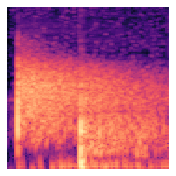

In [10]:
# delete me after
# one time run only. i have accidentally deleted test folder :-/ 
print('Working on subset from df_test')
generate_melspec(df_test)

Working on subset from dfa_1
0.2 pct FileCount = 1: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound2/train/100032-3-0-0.wav.png
0.4 pct FileCount = 2: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound2/train/100652-3-0-0.wav.png
0.6 pct FileCount = 3: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound2/train/100652-3-0-1.wav.png
0.8 pct FileCount = 4: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound2/train/100652-3-0-2.wav.png
1.0 pct FileCount = 5: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound2/train/100652-3-0-3.wav.png
1.2 pct FileCount = 6: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound2/train/100795-3-0-0.wav.png
1.4 pct FileCount = 7: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound2/train/100795-3-1-0.wav.png
1.6 pct FileCount = 8: Working on spectogram /content/

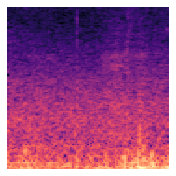

In [ ]:
print('Working on subset from dfa_1')
generate_melspec(dfa_1)


Working on subset from dfa_2
0.2 pct FileCount = 1: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound2/train/203516-3-0-0.wav.png
0.4 pct FileCount = 2: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound2/train/204773-3-7-1.wav.png
0.6 pct FileCount = 3: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound2/train/204773-3-8-0.wav.png
0.8 pct FileCount = 4: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound2/train/204773-3-9-0.wav.png
1.0 pct FileCount = 5: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound2/train/204773-3-9-1.wav.png
1.2 pct FileCount = 6: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound2/train/204919-3-0-0.wav.png
1.4 pct FileCount = 7: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound2/train/204919-3-1-0.wav.png
1.6 pct FileCount = 8: Working on spectogram /content/

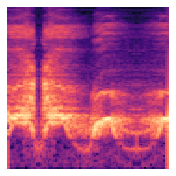

In [ ]:
print('Working on subset from dfa_2')
generate_melspec(dfa_2)

Working on subset from dfa_3
0.2 pct FileCount = 1: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound2/train/100263-2-0-121.wav.png
0.4 pct FileCount = 2: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound2/train/100263-2-0-126.wav.png
0.6 pct FileCount = 3: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound2/train/100263-2-0-137.wav.png
0.8 pct FileCount = 4: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound2/train/100263-2-0-143.wav.png
1.0 pct FileCount = 5: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound2/train/100263-2-0-161.wav.png
1.2 pct FileCount = 6: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound2/train/100263-2-0-3.wav.png
1.4 pct FileCount = 7: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound2/train/100263-2-0-36.wav.png
1.6 pct FileCount = 8: Working on spectogra

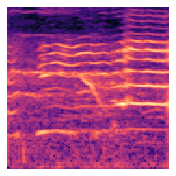

In [ ]:
print('Working on subset from dfa_3')
generate_melspec(dfa_3)

Working on subset from dfa_4
0.2 pct FileCount = 1: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound2/train/184449-2-0-33.wav.png
0.4 pct FileCount = 2: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound2/train/185909-2-0-102.wav.png
0.6 pct FileCount = 3: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound2/train/185909-2-0-116.wav.png
0.8 pct FileCount = 4: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound2/train/185909-2-0-13.wav.png
1.0 pct FileCount = 5: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound2/train/185909-2-0-17.wav.png
1.2 pct FileCount = 6: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound2/train/185909-2-0-22.wav.png
1.4 pct FileCount = 7: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound2/train/185909-2-0-34.wav.png
1.6 pct FileCount = 8: Working on spectogram 

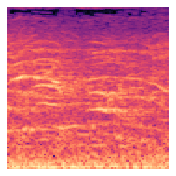

In [ ]:
print('Working on subset from dfa_4')
generate_melspec(dfa_4)

Working on subset from dfa_5
0.2 pct FileCount = 1: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound2/train/100852-0-0-1.wav.png
0.4 pct FileCount = 2: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound2/train/100852-0-0-10.wav.png
0.6 pct FileCount = 3: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound2/train/100852-0-0-11.wav.png
0.8 pct FileCount = 4: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound2/train/100852-0-0-12.wav.png
1.0 pct FileCount = 5: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound2/train/100852-0-0-13.wav.png
1.2 pct FileCount = 6: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound2/train/100852-0-0-14.wav.png
1.4 pct FileCount = 7: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound2/train/100852-0-0-15.wav.png
1.6 pct FileCount = 8: Working on spectogram /co

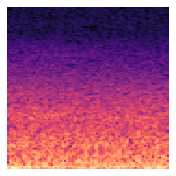

In [ ]:
print('Working on subset from dfa_5')
generate_melspec(dfa_5)

Working on subset from dfa_6
0.2 pct FileCount = 1: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound2/train/178686-0-0-44.wav.png
0.4 pct FileCount = 2: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound2/train/178686-0-0-45.wav.png
0.6 pct FileCount = 3: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound2/train/178686-0-0-46.wav.png
0.8 pct FileCount = 4: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound2/train/178686-0-0-53.wav.png
1.0 pct FileCount = 5: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound2/train/178686-0-0-55.wav.png
1.2 pct FileCount = 6: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound2/train/178686-0-0-57.wav.png
1.4 pct FileCount = 7: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound2/train/178686-0-0-6.wav.png
1.6 pct FileCount = 8: Working on spectogram /co

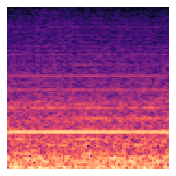

In [ ]:
print('Working on subset from dfa_6')
generate_melspec(dfa_6)

Working on subset from dfa_7
0.2 pct FileCount = 1: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound2/train/101848-9-0-1.wav.png
0.4 pct FileCount = 2: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound2/train/101848-9-0-2.wav.png
0.6 pct FileCount = 3: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound2/train/101848-9-0-3.wav.png
0.8 pct FileCount = 4: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound2/train/101848-9-0-8.wav.png
1.0 pct FileCount = 5: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound2/train/101848-9-0-9.wav.png
1.2 pct FileCount = 6: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound2/train/105425-9-0-1.wav.png
1.4 pct FileCount = 7: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound2/train/105425-9-0-10.wav.png
1.6 pct FileCount = 8: Working on spectogram /content

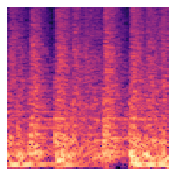

In [ ]:
print('Working on subset from dfa_7')
generate_melspec(dfa_7)

Working on subset from dfa_8
0.44 pct FileCount = 1: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound2/train/69304-9-0-15.wav.png
0.87 pct FileCount = 2: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound2/train/69304-9-0-6.wav.png
1.31 pct FileCount = 3: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound2/train/69304-9-0-7.wav.png
1.75 pct FileCount = 4: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound2/train/71866-9-0-14.wav.png
2.18 pct FileCount = 5: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound2/train/71866-9-0-21.wav.png
2.62 pct FileCount = 6: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound2/train/71866-9-0-23.wav.png
3.06 pct FileCount = 7: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound2/train/71866-9-0-3.wav.png
3.49 pct FileCount = 8: Working on spectogram /con

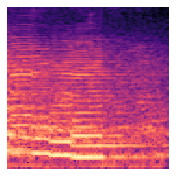

In [9]:
print('Working on subset from dfa_8')
generate_melspec(dfa_8)

Working on subset from dfa_9
0.2 pct FileCount = 1: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound2/train/102857-5-0-1.wav.png
0.4 pct FileCount = 2: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound2/train/102857-5-0-10.wav.png
0.6 pct FileCount = 3: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound2/train/102857-5-0-11.wav.png
0.8 pct FileCount = 4: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound2/train/102857-5-0-12.wav.png
1.0 pct FileCount = 5: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound2/train/102857-5-0-13.wav.png
1.2 pct FileCount = 6: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound2/train/102857-5-0-14.wav.png
1.4 pct FileCount = 7: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound2/train/102857-5-0-15.wav.png
1.6 pct FileCount = 8: Working on spectogram /co

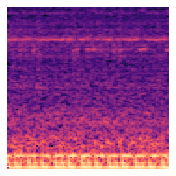

In [10]:
print('Working on subset from dfa_9')
generate_melspec(dfa_9)

Working on subset from dfa_10
0.2 pct FileCount = 1: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound2/train/17578-5-0-16.wav.png
0.4 pct FileCount = 2: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound2/train/17578-5-0-18.wav.png
0.6 pct FileCount = 3: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound2/train/17578-5-0-2.wav.png
0.8 pct FileCount = 4: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound2/train/17578-5-0-21.wav.png
1.0 pct FileCount = 5: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound2/train/17578-5-0-22.wav.png
1.2 pct FileCount = 6: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound2/train/17578-5-0-23.wav.png
1.4 pct FileCount = 7: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound2/train/17578-5-0-24.wav.png
1.6 pct FileCount = 8: Working on spectogram /content/

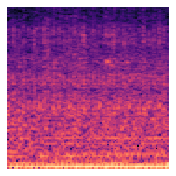

In [11]:
print('Working on subset from dfa_10')
generate_melspec(dfa_10)

Working on subset from dfa_11
0.2 pct FileCount = 1: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound2/train/103074-7-0-1.wav.png
0.4 pct FileCount = 2: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound2/train/103074-7-0-2.wav.png
0.6 pct FileCount = 3: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound2/train/103074-7-1-0.wav.png
0.8 pct FileCount = 4: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound2/train/103074-7-1-1.wav.png
1.0 pct FileCount = 5: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound2/train/103074-7-1-2.wav.png
1.2 pct FileCount = 6: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound2/train/103074-7-1-3.wav.png
1.4 pct FileCount = 7: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound2/train/103074-7-1-4.wav.png
1.6 pct FileCount = 8: Working on spectogram /content

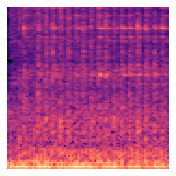

In [12]:
print('Working on subset from dfa_11')
generate_melspec(dfa_11)

Working on subset from dfa_12
0.2 pct FileCount = 1: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound2/train/178261-7-3-0.wav.png
0.4 pct FileCount = 2: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound2/train/178261-7-3-1.wav.png
0.6 pct FileCount = 3: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound2/train/178261-7-3-2.wav.png
0.8 pct FileCount = 4: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound2/train/178261-7-3-3.wav.png
1.0 pct FileCount = 5: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound2/train/178261-7-3-4.wav.png
1.2 pct FileCount = 6: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound2/train/178261-7-3-5.wav.png
1.4 pct FileCount = 7: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound2/train/178261-7-3-6.wav.png
1.6 pct FileCount = 8: Working on spectogram /content

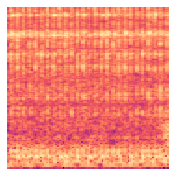

In [13]:
print('Working on subset from dfa_12')
generate_melspec(dfa_12)

Working on subset from dfa_13
0.2 pct FileCount = 1: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound2/train/103199-4-0-3.wav.png
0.4 pct FileCount = 2: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound2/train/103199-4-0-4.wav.png
0.6 pct FileCount = 3: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound2/train/103199-4-0-5.wav.png
0.8 pct FileCount = 4: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound2/train/103199-4-0-6.wav.png
1.0 pct FileCount = 5: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound2/train/103199-4-1-0.wav.png
1.2 pct FileCount = 6: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound2/train/103199-4-2-0.wav.png
1.4 pct FileCount = 7: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound2/train/103199-4-2-1.wav.png
1.6 pct FileCount = 8: Working on spectogram /content

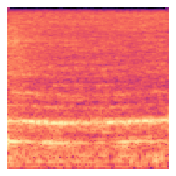

In [14]:
print('Working on subset from dfa_13')
generate_melspec(dfa_13)

Working on subset from dfa_14
0.2 pct FileCount = 1: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound2/train/187863-4-0-3.wav.png
0.4 pct FileCount = 2: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound2/train/187863-4-0-4.wav.png
0.6 pct FileCount = 3: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound2/train/187863-4-0-5.wav.png
0.8 pct FileCount = 4: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound2/train/19007-4-0-0.wav.png
1.0 pct FileCount = 5: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound2/train/195063-4-0-0.wav.png
1.2 pct FileCount = 6: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound2/train/195063-4-1-0.wav.png
1.4 pct FileCount = 7: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound2/train/199929-4-0-0.wav.png
1.6 pct FileCount = 8: Working on spectogram /content/

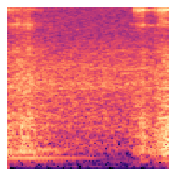

In [15]:
print('Working on subset from dfa_14')
generate_melspec(dfa_14)

Working on subset from dfa_15
0.2 pct FileCount = 1: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound2/train/102853-8-0-1.wav.png
0.4 pct FileCount = 2: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound2/train/102853-8-0-2.wav.png
0.6 pct FileCount = 3: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound2/train/102853-8-0-3.wav.png
0.8 pct FileCount = 4: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound2/train/102853-8-0-4.wav.png
1.0 pct FileCount = 5: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound2/train/102853-8-0-5.wav.png
1.2 pct FileCount = 6: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound2/train/102853-8-0-6.wav.png
1.4 pct FileCount = 7: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound2/train/102853-8-1-0.wav.png
1.6 pct FileCount = 8: Working on spectogram /content

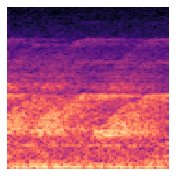

In [16]:
print('Working on subset from dfa_15')
generate_melspec(dfa_15)

Working on subset from dfa_16
0.2 pct FileCount = 1: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound2/train/164053-8-3-0.wav.png
0.4 pct FileCount = 2: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound2/train/164782-8-0-0.wav.png
0.6 pct FileCount = 3: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound2/train/164782-8-0-1.wav.png
0.8 pct FileCount = 4: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound2/train/164782-8-0-2.wav.png
1.0 pct FileCount = 5: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound2/train/164782-8-0-3.wav.png
1.2 pct FileCount = 6: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound2/train/164782-8-0-4.wav.png
1.4 pct FileCount = 7: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound2/train/164782-8-0-5.wav.png
1.6 pct FileCount = 8: Working on spectogram /content

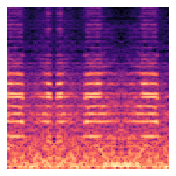

In [17]:
print('Working on subset from dfa_16')
generate_melspec(dfa_16)

Working on subset from dfa_17
0.14 pct FileCount = 1: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound2/train/164626-1-0-0.wav.png
0.27 pct FileCount = 2: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound2/train/164627-1-0-0.wav.png
0.41 pct FileCount = 3: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound2/train/170243-1-0-0.wav.png
0.55 pct FileCount = 4: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound2/train/17074-1-0-0.wav.png
0.68 pct FileCount = 5: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound2/train/17124-1-0-0.wav.png
0.82 pct FileCount = 6: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound2/train/171249-1-0-0.wav.png
0.96 pct FileCount = 7: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound2/train/171249-1-1-0.wav.png
1.09 pct FileCount = 8: Working on spectogram /c

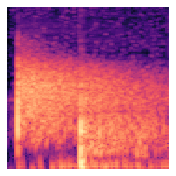

In [18]:
print('Working on subset from dfa_17')
generate_melspec(dfa_17)

Create a backup of the spectograms

In [5]:
! cp /content/gdrive/MyDrive/urbansound/spectograms/protosound2/train/* /content/gdrive/MyDrive/urbansound/spectograms/protosound2/all_backup

In [6]:
! cp /content/gdrive/MyDrive/urbansound/spectograms/protosound2/test/* /content/gdrive/MyDrive/urbansound/spectograms/protosound2/all_backup

In [ ]:
! cp -R /content/gdrive/MyDrive/urbansound/spectograms/protosound2/dataset/train/* /content/gdrive/MyDrive/urbansound/spectograms/protosound2/all_labels

In [ ]:
! cp -R /content/gdrive/MyDrive/urbansound/spectograms/protosound2/dataset/test/* /content/gdrive/MyDrive/urbansound/spectograms/protosound2/all_labels

## Create labels <br>
backup spectograms in all_backup then create dataset folder

In [ ]:
from google.colab import drive #Only if you are using Google Drive
drive.mount('/content/gdrive')
drive.mount("/content/gdrive", force_remount=True)
%cd /content/gdrive/My\ Drive/

In [7]:
import pandas as pd
import os
import shutil

us8kf = '/content/gdrive/MyDrive/urbansound/UrbanSound8K_processed.csv'
#us8kf = '/content/gdrive/MyDrive/urbansound/UrbanSound8K.csv'
mycsv = pd.read_csv(us8kf)
df_us8kf = pd.DataFrame(mycsv)
df_us8kf.info()
figbase_target = '/content/gdrive/MyDrive/urbansound/spectograms/protosound2/dataset/'
figbase_source = '/content/gdrive/MyDrive/urbansound/spectograms/protosound2/'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8732 entries, 0 to 8731
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       8732 non-null   int64  
 1   slice_file_name  8732 non-null   object 
 2   fsID             8732 non-null   int64  
 3   start            8732 non-null   float64
 4   end              8732 non-null   float64
 5   salience         8732 non-null   int64  
 6   fold             8732 non-null   int64  
 7   classID          8732 non-null   int64  
 8   class            8732 non-null   object 
 9   wavfile          8732 non-null   object 
 10  figfile          8732 non-null   object 
 11  split            8732 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 818.8+ KB


In [8]:
# work on training dataset
# work on training spectograms
#target_dir = '/content/gdrive/MyDrive/dataset3/train'
dftrain=df_us8kf[df_us8kf['split'] == 'train'].copy()
filect = 0
for i in dftrain.itertuples():
  # get source 
  label = i[9]
  print(label)
  src_file = figbase_source+str(i[12])+'/'+str(i[2])+'.png'
  # get target 
  tgt_file = figbase_target+'train/'+label+'/'+str(i[1])+'.png'
  tgt_dir = figbase_target+'train/'+label
  #print('Source: '+src_file)
  #print('Target: '+tgt_file)
  # check if target dir is existing, if not create it
  if os.path.isdir(tgt_dir) == False:
    os.mkdir(tgt_dir)
    print(tgt_dir+' directory created')
  # copy file from source to target
  print('File for sound: '+label+' copied from '+src_file+' to '+tgt_dir)
  # copy from source to target
  if os.path.isfile(src_file) == True:
    filect=filect+1
    print(str(filect)+': Copying file '+ src_file +' to '+tgt_dir)
    shutil.copy(src_file, tgt_file)
  else: print('Error!: File '+src_file+' is missing. Unable to move!')

Streaming output truncated to the last 5000 lines.
File for sound: drilling copied from /content/gdrive/MyDrive/urbansound/spectograms/protosound2/train/205874-4-10-0.wav.png to /content/gdrive/MyDrive/urbansound/spectograms/protosound2/dataset/train/drilling
5306: Copying file /content/gdrive/MyDrive/urbansound/spectograms/protosound2/train/205874-4-10-0.wav.png to /content/gdrive/MyDrive/urbansound/spectograms/protosound2/dataset/train/drilling
drilling
File for sound: drilling copied from /content/gdrive/MyDrive/urbansound/spectograms/protosound2/train/205874-4-11-0.wav.png to /content/gdrive/MyDrive/urbansound/spectograms/protosound2/dataset/train/drilling
5307: Copying file /content/gdrive/MyDrive/urbansound/spectograms/protosound2/train/205874-4-11-0.wav.png to /content/gdrive/MyDrive/urbansound/spectograms/protosound2/dataset/train/drilling
drilling
File for sound: drilling copied from /content/gdrive/MyDrive/urbansound/spectograms/protosound2/train/205874-4-2-0.wav.png to /cont

In [9]:
# work on test dataset
# work on test spectograms
figbase_target = '/content/gdrive/MyDrive/urbansound/spectograms/protosound2/dataset/'
figbase_source = '/content/gdrive/MyDrive/urbansound/spectograms/protosound2/'

dftest=df_us8kf[df_us8kf['split'] == 'test'].copy()
filect = 0
for i in dftest.itertuples():
  # get source 
  label = i[9]
  print(label)
  src_file = figbase_source+str(i[12])+'/'+str(i[2])+'.png'
  # get target 
  tgt_file = figbase_target+'test/'+label+'/'+str(i[1])+'.png'
  tgt_dir = figbase_target+'test/'+label
  #print('Source: '+src_file)
  #print('Target: '+tgt_file)
  # check if target dir is existing, if not create it
  if os.path.isdir(tgt_dir) == False:
    os.mkdir(tgt_dir)
    print(tgt_dir+' directory created')
  # copy file from source to target
  print('File for sound: '+label+' copied from '+src_file+' to '+tgt_dir)
  # copy from source to target
  if os.path.isfile(src_file) == True:
    filect=filect+1
    print(str(filect)+': Copying file '+ src_file +' to '+tgt_dir)
    shutil.copy(src_file, tgt_file)
  else: print('Error!: File '+src_file+' is missing. Unable to move!')

Streaming output truncated to the last 5000 lines.
File for sound: dog_bark copied from /content/gdrive/MyDrive/urbansound/spectograms/protosound2/test/72829-3-0-0.wav.png to /content/gdrive/MyDrive/urbansound/spectograms/protosound2/dataset/test/dog_bark
81: Copying file /content/gdrive/MyDrive/urbansound/spectograms/protosound2/test/72829-3-0-0.wav.png to /content/gdrive/MyDrive/urbansound/spectograms/protosound2/dataset/test/dog_bark
dog_bark
File for sound: dog_bark copied from /content/gdrive/MyDrive/urbansound/spectograms/protosound2/test/72829-3-0-1.wav.png to /content/gdrive/MyDrive/urbansound/spectograms/protosound2/dataset/test/dog_bark
82: Copying file /content/gdrive/MyDrive/urbansound/spectograms/protosound2/test/72829-3-0-1.wav.png to /content/gdrive/MyDrive/urbansound/spectograms/protosound2/dataset/test/dog_bark
dog_bark
File for sound: dog_bark copied from /content/gdrive/MyDrive/urbansound/spectograms/protosound2/test/72829-3-0-2.wav.png to /content/gdrive/MyDrive/urb

Create a copy/backup of the labelled spectograms in all_labels directory

In [10]:
! cp -R /content/gdrive/MyDrive/urbansound/spectograms/protosound2/dataset/train/* /content/gdrive/MyDrive/urbansound/spectograms/protosound2/all_labels
! cp -R /content/gdrive/MyDrive/urbansound/spectograms/protosound2/dataset/test/* /content/gdrive/MyDrive/urbansound/spectograms/protosound2/all_labels

Copy images to directory for tensorflow pickup

In [11]:
! cp -R /content/gdrive/MyDrive/urbansound/spectograms/protosound2/all_labels/* /content/gdrive/MyDrive/content/img_dir/all/

In [12]:
! cp -R /content/gdrive/MyDrive/urbansound/spectograms/protosound2/dataset/train/* /content/gdrive/MyDrive/content/img_dir/train/
! cp -R /content/gdrive/MyDrive/urbansound/spectograms/protosound2/dataset/test/* /content/gdrive/MyDrive/content/img_dir/test/